# Ejemplos de Modelos Supervisados - Parte I

Los siguientes ejemplos corresponden a los temas presentados en la clase "Aprendizaje Supervisado - Parte I":

## Ejemplo de kNN con scikit-learn

* Con scikit-learn es posible cargar set de datos, para una revisión detallada de cuales sets favor revisar: http://scikit-learn.org/stable/datasets/index.html#toy-datasets
* Procedemos a cargar las librerias correspondientes, **train_test_split** ya lo conocemos de la práctica anterior. La novedad acá es **KNeighborsClassifier** que corresponde al clasificador kNN y el llamado del dataset **load_breast_cancer**:


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Se carga ahora el set de datos **load_breast_cancer**:

In [7]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

Inicializamos las listas:

In [8]:
training_accuracy = []
test_accuracy = []

Creamos la curva de "*training/test acurracy vrs. k*", para más detalle del parámetro **score** refererirse a la documentación en: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html "Returns the mean accuracy on the given test data and labels".

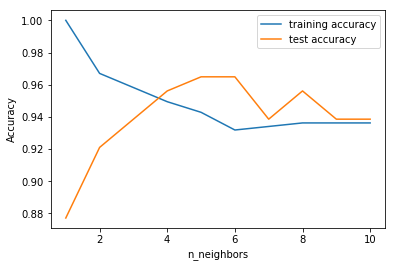

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Ejemplo Linear Regression

Se llama a la libreria **LinearRegression** y se ejecuta el clasificador:

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression().fit(X_train, y_train)

Se obtiennen los scores, para más detalle del parámetro **score** en este caso de Linear Regression, refererirse a la documentación en: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html "Returns the coefficient of determination R^2 of the prediction.".

In [12]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.69


## Ejemplo Logistic Regression

Procedemos como en el casos anteriores, para más detalles sobre *Logistic Regression* referirse a: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [31]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.33)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.950
Test set score: 0.968


Probamos hacer una curva de training/test score para varios valores de **C**?

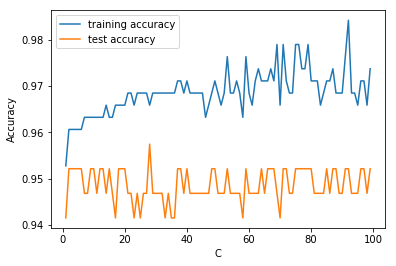

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

training_acc = []
test_acc = []

rango = range(1, 100)
for c in rango:
    # se construye el modelo de clasificacion
    clf = LogisticRegression(C=c)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(clf.score(X_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

Dado que cada vez que se ejecute, se seleccionan diferentes particiones los resultados varian cada vez que se corre, en esta captura se aprecia como el valor de C que mejor se adapta en el rango de 1-100 corresponde a aproximadamente 20.

<img src="cfitval.png" style="width: 500px;"/>